In [1]:
print("Hello world")


Hello world


In [2]:
import pandas as pd

In [3]:
raw_data = pd.read_csv('ecommerce.csv')

In [4]:
raw_data

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...,...,...,...
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872\nLake Jamiefurt,...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510


In [5]:
raw_data1=raw_data[['Time on App', 'Time on Website', 'Length of Membership','Yearly Amount Spent']]

In [6]:
raw_data1

,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,12.655651,39.577668,4.082621,587.951054
1,11.109461,37.268959,2.664034,392.204933
2,11.330278,37.110597,4.104543,487.547505
3,13.717514,36.721283,3.120179,581.852344
4,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...
495,13.566160,36.417985,3.746573,573.847438
496,11.695736,37.190268,3.576526,529.049004
497,11.499409,38.332576,4.958264,551.620145
498,12.391423,36.840086,2.336485,456.469510


In [7]:
import seaborn as sns


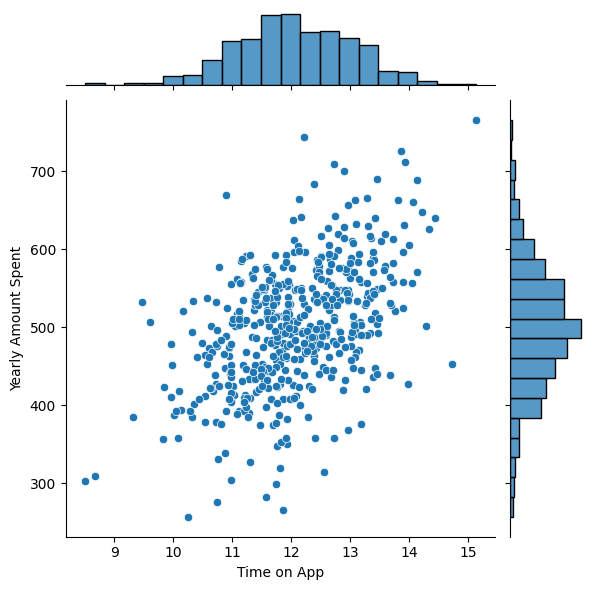

In [8]:
sns.jointplot(x='Time on App',y='Yearly Amount Spent', data=raw_data1)

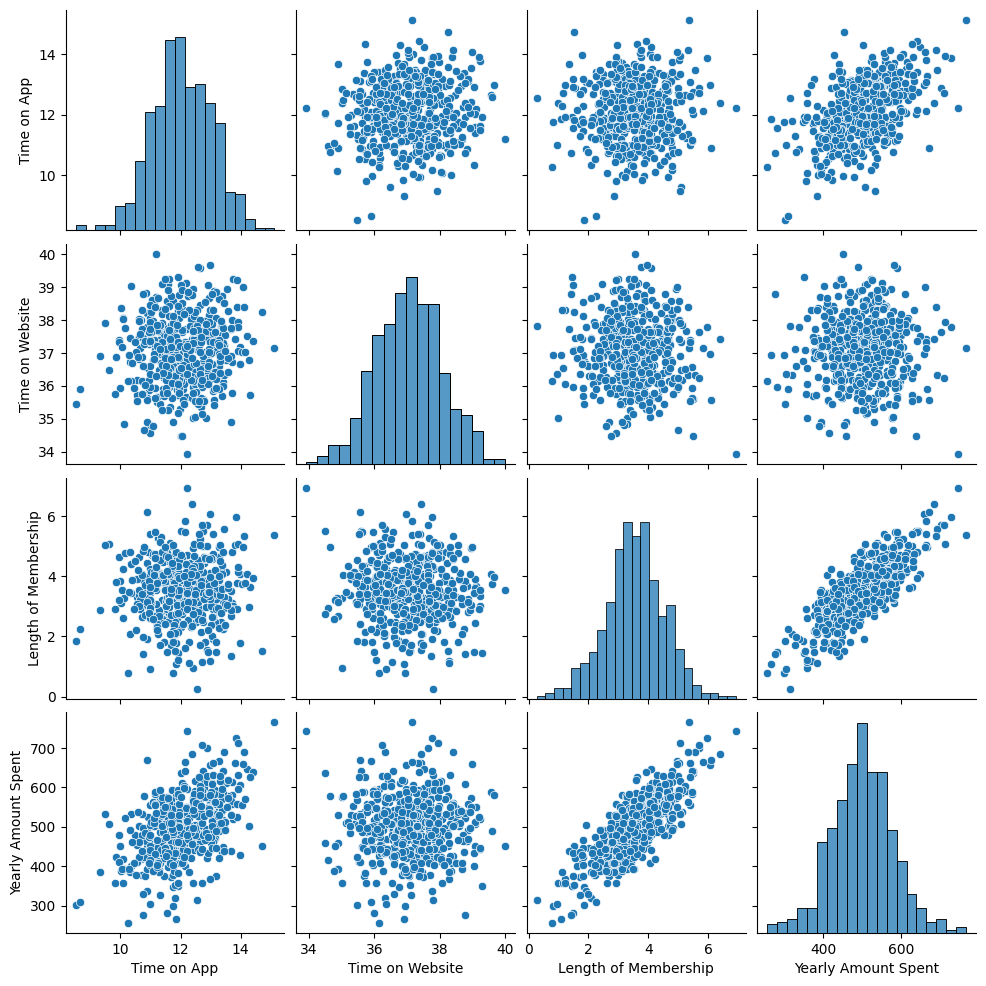

In [9]:
sns.pairplot(raw_data1, kind='scatter')

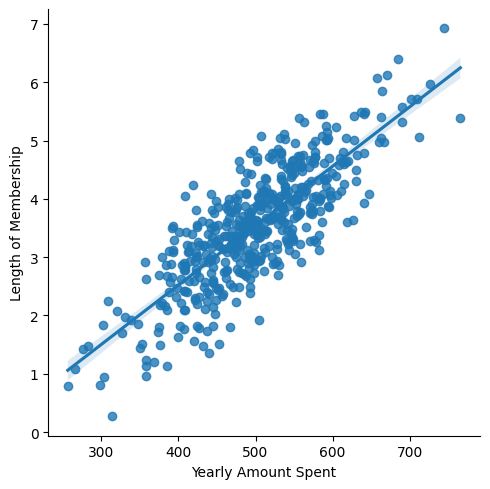

In [10]:
sns.lmplot(x='Yearly Amount Spent', y='Length of Membership', data=raw_data1)

In [11]:
raw_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Time on App           500 non-null    float64
 1   Time on Website       500 non-null    float64
 2   Length of Membership  500 non-null    float64
 3   Yearly Amount Spent   500 non-null    float64
dtypes: float64(4)
memory usage: 15.8 KB


# SPLITTING THE DATA

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X=raw_data1[['Time on App', 'Time on Website', 'Length of Membership']]
y=raw_data1['Yearly Amount Spent']

In [14]:
X.head()

,Time on App,Time on Website,Length of Membership
0,12.655651,39.577668,4.082621
1,11.109461,37.268959,2.664034
2,11.330278,37.110597,4.104543
3,13.717514,36.721283,3.120179
4,12.795189,37.536653,4.446308


In [15]:
y.head()

0    587.951054
1    392.204933
2    487.547505
3    581.852344
4    599.406092
Name: Yearly Amount Spent, dtype: float64

In [16]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.3, random_state=40)

In [17]:
import LinearRegression

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
lm=LinearRegression()

In [20]:
lm.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [21]:
lm.coef_

array([38.33036581, -0.21786843, 63.171564  ])

In [22]:
cdf=pd.DataFrame(lm.coef_, X.columns, columns=['cdf'])


In [23]:
cdf

,cdf
Time on App,38.330366
Time on Website,-0.217868
Length of Membership,63.171564


In [24]:
lm.score(X,y)

0.881016191814638

# Training the model with multivariable regression using OLS

In [25]:
import statsmodels.api as sm

In [26]:
X=sm.add_constant(X_train)

In [27]:
X

,const,Time on App,Time on Website,Length of Membership
154,1.0,12.050267,36.959643,3.864861
69,1.0,11.187539,40.005182,3.552650
41,1.0,10.634561,37.496690,4.646120
444,1.0,12.132509,35.456798,3.072076
361,1.0,10.347877,39.045156,3.434560
...,...,...,...,...
440,1.0,11.965980,36.831536,3.549036
165,1.0,12.718039,37.661107,3.675849
7,1.0,12.351959,37.373359,4.434273
219,1.0,10.748534,35.738707,4.835529


In [28]:
model=sm.OLS(y_train, X)
model_fit=model.fit()

In [29]:
print(model_fit.summary())

                             OLS Regression Results                            
Dep. Variable:     Yearly Amount Spent   R-squared:                       0.887
Model:                             OLS   Adj. R-squared:                  0.886
Method:                  Least Squares   F-statistic:                     902.4
Date:                 Tue, 19 Aug 2025   Prob (F-statistic):          3.52e-163
Time:                         18:01:54   Log-Likelihood:                -1642.4
No. Observations:                  350   AIC:                             3293.
Df Residuals:                      346   BIC:                             3308.
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 

# predicting the test data

In [30]:
predictions=lm.predict(X_test)

In [31]:
print(predictions)

[548.03238074 534.73317916 504.36598914 543.07034241 558.86788388
 495.16233889 597.01405261 480.12581262 464.99659198 467.95646118
 513.23190665 369.67489766 408.70629931 642.64050907 548.62288917
 401.2801284  523.95728894 529.48540487 719.14444431 470.40085839
 548.78267933 468.3792404  500.38674028 415.38173241 555.6844162
 486.70999702 459.46218727 391.26274225 314.18569293 428.23077801
 553.03575072 534.1264218  531.64682122 350.14198138 504.04201223
 514.4265082  543.46389291 494.90844646 539.3410253  519.59840672
 413.77045047 504.53210747 578.71558235 488.92264558 480.24554565
 481.24106504 422.11956012 606.88458446 520.4958202  448.31031071
 403.17959493 420.56846232 470.32221976 614.92585083 513.14398924
 445.38210849 586.66755486 615.94849597 419.68911757 427.9427525
 548.5354765  536.20935414 486.31732728 563.4601711  397.84838698
 509.90220545 506.60534907 255.82296474 584.45232843 469.51597995
 457.89009561 503.53602685 413.12553188 472.82432567 692.33174195
 543.0363716

In [32]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Yearly Amount Spent vs. Model Predictions')

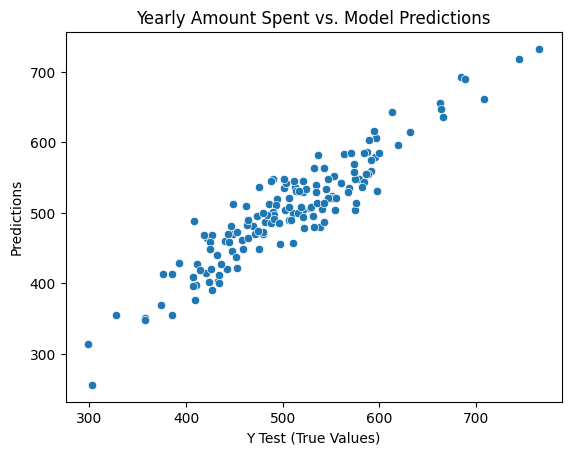

In [33]:
# Tell Seaborn explicitly which variable is for the x-axis and which is for the y-axis
sns.scatterplot(x=y_test, y=predictions)

plt.xlabel('Y Test (True Values)') # It's good practice to label your axes
plt.ylabel('Predictions')
plt.title('Yearly Amount Spent vs. Model Predictions')

In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

In [35]:
print('mean absolute error:', mean_absolute_error(y_test, predictions))
print('mean squared error:',mean_squared_error(y_test,predictions))
print('rooted mean squared error', math.sqrt(mean_squared_error(y_test,predictions)))

mean absolute error: 23.985661421336307
mean squared error: 862.9437178766458
rooted mean squared error 29.375903694637987
